# **Data Preparation**
### Download data from kaggle ASL Alphabet (https://www.kaggle.com/datasets/grassknoted/asl-alphabet)


# import Tensorflow and check available GPU

In [113]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import tensorflow as tf
import numpy as np
import os
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Load data into training set and validation set

In [7]:
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
  'asl_alphabet_train/asl_alphabet_train',
  validation_split=0.2,
  subset="both",
  seed=123,
  image_size=(200, 200),
  batch_size=32)

train_ds_repeat = train_ds.repeat()

Found 87000 files belonging to 29 classes.
Using 69600 files for training.
Using 17400 files for validation.


2023-04-27 16:25:32.012098: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-27 16:25:32.012458: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-27 16:25:32.012763: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-27 16:25:38.143655: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-27 16:25:38.164466: I tensorflow/compile

In [8]:
train_ds.class_names

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'del',
 'nothing',
 'space']

2023-04-27 16:25:40.384118: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [69600]
	 [[{{node Placeholder/_4}}]]
2023-04-27 16:25:40.384684: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [69600]
	 [[{{node Placeholder/_4}}]]


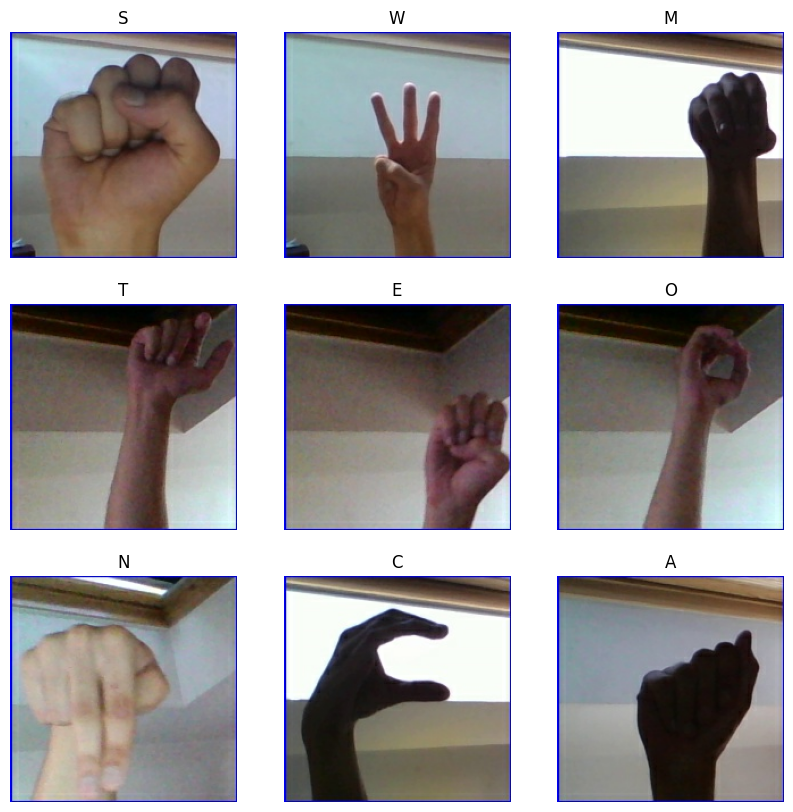

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [67]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(200, 200, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(29, activation='softmax')
])

In [68]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_11 (Rescaling)    (None, 200, 200, 3)       0         
                                                                 
 conv2d_31 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 46, 46, 128)     

In [70]:
history = model.fit(
    train_ds_repeat,
    steps_per_epoch=100,
    epochs=30,
    validation_data=val_ds,
    validation_steps=8)

Epoch 1/30
100/100 [==============================] - 4s 25ms/step - loss: 3.3990 - accuracy: 0.0859 - val_loss: 2.7470 - val_accuracy: 0.1914
Epoch 2/30
100/100 [==============================] - 2s 24ms/step - loss: 2.2766 - accuracy: 0.3103 - val_loss: 1.8970 - val_accuracy: 0.3828
Epoch 3/30
100/100 [==============================] - 2s 24ms/step - loss: 1.5133 - accuracy: 0.5144 - val_loss: 1.2607 - val_accuracy: 0.5859
Epoch 4/30
100/100 [==============================] - 2s 25ms/step - loss: 1.1179 - accuracy: 0.6375 - val_loss: 0.9489 - val_accuracy: 0.6562
Epoch 5/30
100/100 [==============================] - 2s 24ms/step - loss: 0.8095 - accuracy: 0.7319 - val_loss: 0.7299 - val_accuracy: 0.7539
Epoch 6/30
100/100 [==============================] - 2s 24ms/step - loss: 0.6559 - accuracy: 0.7859 - val_loss: 0.5210 - val_accuracy: 0.8086
Epoch 7/30
100/100 [==============================] - 2s 24ms/step - loss: 0.5776 - accuracy: 0.8059 - val_loss: 0.5335 - val_accuracy: 0.7891

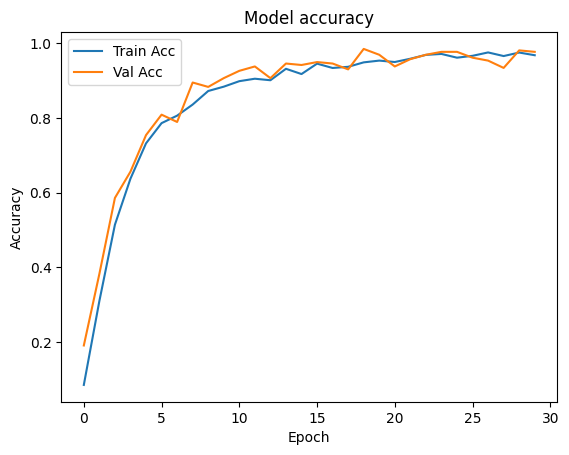

In [71]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Acc', 'Val Acc'], loc='upper left')
plt.show()

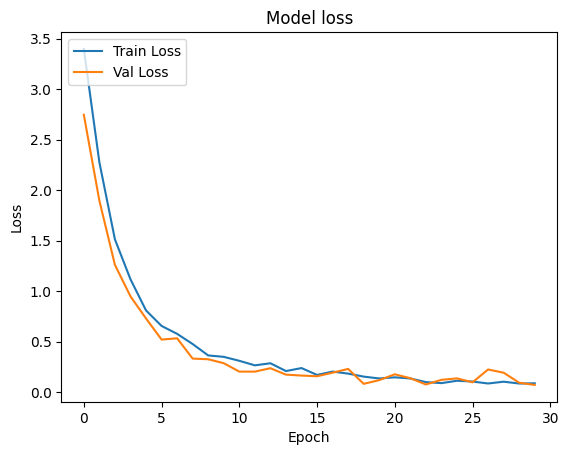

In [72]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Val Loss'], loc='upper left')
plt.show()

In [108]:
misclassified_examples = []
for x, y_true in tqdm(val_ds):
    y_pred = model.predict(x, verbose=-1)
    for i,d in enumerate(x):
        y_true_i = y_true[i]
        y_pred_i = np.argmax(y_pred[i])
        if y_true_i != y_pred_i:
            misclassified_examples.append((d, y_true_i, y_pred_i))

  0%|          | 0/544 [00:00<?, ?it/s]

In [109]:
len(misclassified_examples)

636

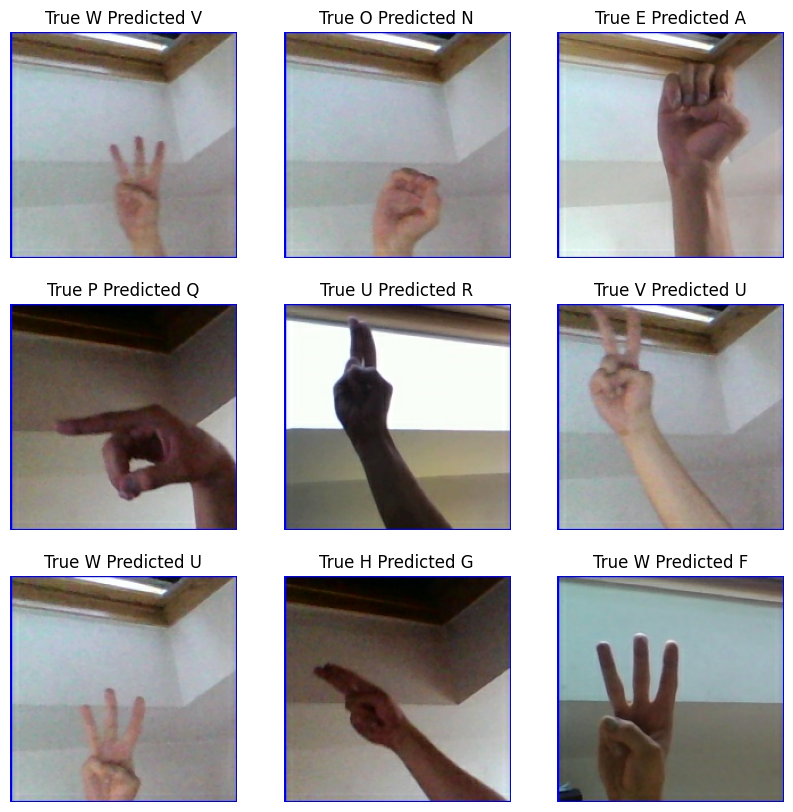

In [114]:
# plt.imshow(misclassified_examples[0][0].numpy().astype("uint8"))
# plt.title(f'True {misclassified_examples[0][1].numpy().astype("uint8")} Predicted {misclassified_examples[0][2]}')

plt.figure(figsize=(10, 10))
for i in range(9):
    d, y_true_i, y_pred_i = misclassified_examples[i]
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(d.numpy().astype("uint8"))
    plt.title(f'True {train_ds.class_names[y_true_i.numpy().astype("uint8")]} Predicted {train_ds.class_names[y_pred_i]}')
    plt.axis("off")